<a href="https://colab.research.google.com/github/danayoou/CavitiesDetection/blob/main/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/gdrive')

MessageError: ignored

In [ ]:
%cd /content/gdrive/MyDrive/Seoultech/TeamProject/ML2/yolov5
!pip install -r requirements.txt

/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/yolov5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import glob
import tqdm
from PIL import Image
from PIL import ImageDraw, ImageFont
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2

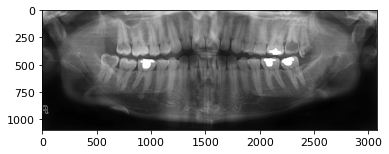

In [ ]:
img = Image.open('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/unlabeled_jpg_te/78.jpg')
plt.imshow(img)

In [ ]:
#박스 위치 확인
import torch
import glob

model = torch.hub.load('.', 'custom', path='/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/yolov5/runs/train/gun_yolov5s_results18/weights/best.pt', source='local')
# img_list = glob.glob('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/unlabeled_jpg_te/*.jpg')
# print(img_list)

coordinates = []
# for i in range (len(img_list)):
#   im = img_list[i]
#   results = model(im)

results = model(img)

  # 결과
  # results.print()

  # 박스 좌표값 리스트에 넣기
# print('result' + str(i) + ':')
print(results.xyxy[0],'\n')
coordinates.append(results.xyxy[0])
  # results.pandas().xyxy[0]

YOLOv5 🚀 2022-11-8 Python-3.7.15 torch-1.12.1+cu113 CPU

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
Adding AutoShape... 


tensor([[8.13457e+02, 1.99220e+02, 9.82904e+02, 4.37151e+02, 8.82821e-01, 0.00000e+00],
        [9.83989e+02, 1.44691e+02, 1.09540e+03, 4.48051e+02, 8.50643e-01, 0.00000e+00],
        [2.22833e+03, 2.12209e+02, 2.37715e+03, 4.10424e+02, 8.35942e-01, 0.00000e+00],
        [6.81199e+02, 1.91588e+02, 8.29221e+02, 4.09908e+02, 8.30871e-01, 0.00000e+00],
        [2.05102e+03, 1.91411e+02, 2.22627e+03, 4.36850e+02, 8.27486e-01, 0.00000e+00],
        [2.34993e+03, 1.79233e+02, 2.47576e+03, 4.16251e+02, 8.13531e-01, 0.00000e+00],
        [5.35793e+02, 4.42423e+02, 6.93698e+02, 6.04278e+02, 8.10448e-01, 0.00000e+00],
        [5.37044e+02, 3.54099e+02, 6.67926e+02, 6.84735e+02, 8.08670e-01, 0.00000e+00],
        [8.89719e+02, 4.58018e+02, 1.03844e+03, 6.82022e+02, 7.99799e-01, 0.00000e+00],
        [2.20264e+03, 4.51647e+02, 2.36623e+03, 6.55729e+02, 7.97805e-01, 0.00000e+00],
        [1.06809e+03, 1.63002e+02, 1.18735e+03, 4.42118e+02, 7.95499e-01, 0.00000e+00],
        [1.89914e+03, 4.14600e+0

In [ ]:
len(coordinates[0])

49

In [ ]:
# #크롭해서 새로운 이미지 저장하기

# img = Image.open('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/unlabeled_jpg_te/78.jpg')
# for j in range(1, len(coordinates[0]+1)):
#   a = float(coordinates[0][j][0]) #x1
#   b = float(coordinates[0][j][1]) #y1
#   c = float(coordinates[0][j][2]) #x2
#   d = float(coordinates[0][j][3]) #y2

#   box = (a, b, c, d)
#   img_c = img.crop(box)
#   img_c.save(r'/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/혭비야/' + str(1) + '_' + str(j) + '.jpg')

In [ ]:
def compute_intersect_area_rate(index, i, c):

    if i == 0:
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-c] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-c][0]), float(coordinates[index][i-c][1])
      x4, y4 = float(coordinates[index][i-c][2]), float(coordinates[index][i-c][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

In [ ]:
# 인접한 box들과 얼마나 겹치는지 알아보기 위함
# return = 겹치는 영역 / 해당 box 영역

def compute_intersect_area_rate_1(index, i):

    if i == 0:
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-1] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-1][0]), float(coordinates[index][i-1][1])
      x4, y4 = float(coordinates[index][i-1][2]), float(coordinates[index][i-1][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

def compute_intersect_area_rate_2(index, i):

    if (i == 0) or (i == 1):
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-2] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-2][0]), float(coordinates[index][i-2][1])
      x4, y4 = float(coordinates[index][i-2][2]), float(coordinates[index][i-2][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

def compute_intersect_area_rate_3(index, i):

    if (i == 0) or (i == 1) or(i ==2):
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-3] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-3][0]), float(coordinates[index][i-3][1])
      x4, y4 = float(coordinates[index][i-3][2]), float(coordinates[index][i-3][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

def compute_intersect_area_rate_4(index, i):

    if (i == 0) or (i == 1) or (i == 2) or (i == 3):
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-4] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-4][0]), float(coordinates[index][i-4][1])
      x4, y4 = float(coordinates[index][i-4][2]), float(coordinates[index][i-4][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

def compute_intersect_area_rate_5(index, i):

    if (i == 0) or (i == 1) or (i == 2) or (i == 3) or (i == 4):
      return 0

    if (classifications[0][i] != 1) and (classifications[0][i-5] != 1):

      x1, y1 = float(coordinates[index][i][0]), float(coordinates[index][i][1])
      x2, y2 = float(coordinates[index][i][2]), float(coordinates[index][i][3])
      x3, y3 = float(coordinates[index][i-5][0]), float(coordinates[index][i-5][1])
      x4, y4 = float(coordinates[index][i-5][2]), float(coordinates[index][i-5][3])

      if x2 < x3:
        intersect = 0

      if x1 > x4:
        intersect = 0

      if  y2 < y3:
          intersect = 0

      if  y1 > y4:
          intersect = 0

      left_up_x = max(x1, x3)
      left_up_y = max(y1, y3)
      right_down_x = min(x2, x4)
      right_down_y = min(y2, y4)

      width = right_down_x - left_up_x
      height =  right_down_y - left_up_y

      intersect = width * height

      area = (x2-x1)*(y2-y1)

      return intersect/area

    else:
      return 0

In [ ]:
classifications = [[1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,1,1,1,2,1]]

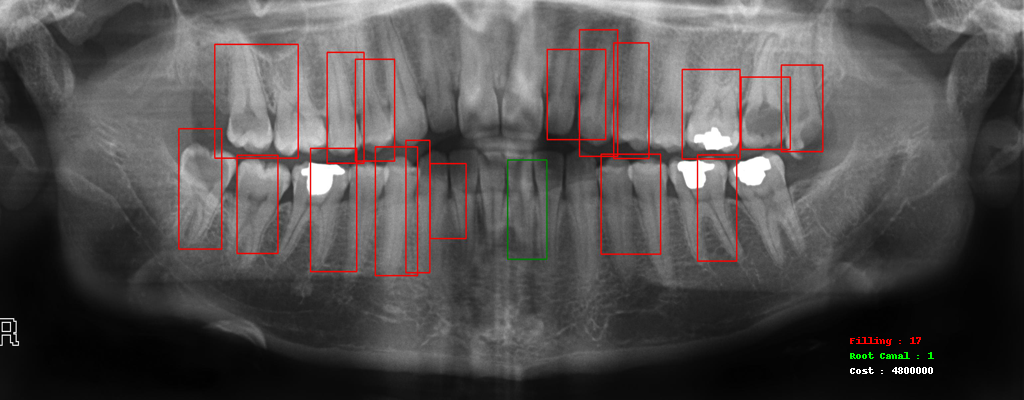

In [ ]:
filling = 0
fluoride = 0
root_canal = 0
img = Image.open('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/unlabeled_jpg_te/78.jpg')
for i, j in zip(range(len(coordinates[0])), range(len(classifications[0]))):

  a = float(coordinates[0][i][0]) #x1
  b = float(coordinates[0][i][1]) #y1
  c = float(coordinates[0][i][2]) #x2
  d = float(coordinates[0][i][3]) #y2

  if compute_intersect_area_rate_1(0, i) > 0.2:
    continue

  if compute_intersect_area_rate_2(0, i) > 0.2:
    continue

  if compute_intersect_area_rate_3(0, i) > 0.2:
    continue

  if compute_intersect_area_rate_4(0, i) > 0.2:
    continue

  if compute_intersect_area_rate_5(0, i) > 0.2:
    continue

  draw = ImageDraw.Draw(img)
  if classifications[0][j] == 0:
    draw.line([(a,b), (a,d), (c,d), (c,b), (a,b)], fill = "red", width=4)
    filling += 1

  if classifications[0][j] == 1:
    continue

  if classifications[0][j] == 2:
    draw.line([(a,b), (a,d), (c,d), (c,b), (a,b)], fill = "green", width=4)
    root_canal += 1

cost = filling*25 + root_canal*55

img.save(('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/result/78.jpg'))
img_r = Image.open('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/result/78.jpg')
img_r = img_r.resize((1024, 400))

ImageDraw.Draw(img_r).text((850, 335), "Filling : " + str(filling), fill = (255, 0, 0))
ImageDraw.Draw(img_r).text((850, 350), "Root Canal : " + str(root_canal), fill = (0, 255, 0))
ImageDraw.Draw(img_r).text((850, 365), "Cost : " + str(cost*10000), fill = (255, 255, 255))

img_r.save(('/content/gdrive/MyDrive/Seoultech/TeamProject/ML2/Data/result/78.jpg'))
img_r

In [ ]:
#